In [15]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


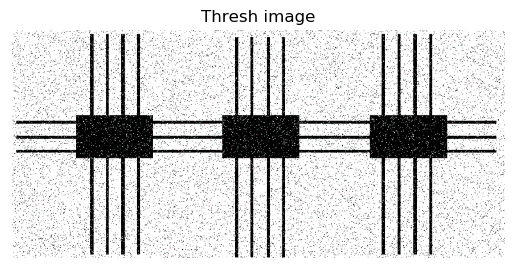

In [27]:

img = cv.imread('example.png')
imgrgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


plt.imshow(imgrgb)
plt.axis('off') 
plt.title('Thresh image')
plt.axis('off') 
plt.show()


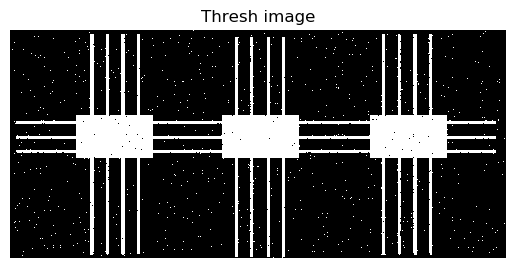

In [17]:
ret, threshold = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)


plt.imshow(cv.cvtColor(threshold, cv.COLOR_BGR2RGB))
plt.axis('off') 
plt.title('Thresh image')
plt.axis('off') 
plt.show()

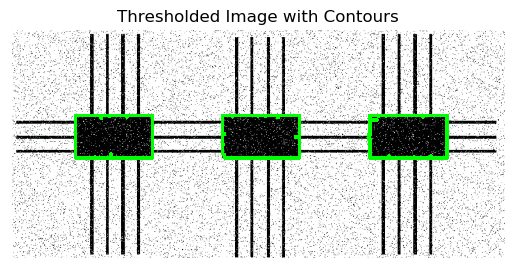

In [34]:
# noise removal
# noise removal
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
threshold = cv.morphologyEx(threshold, cv.MORPH_OPEN, kernel, iterations=2)

# plt.imshow(threshold)
# plt.axis('off') 
# plt.title('Thresh image')
# plt.axis('off') 
# plt.show()
dilation = cv.dilate(threshold, kernel)
contours, _ = cv.findContours(dilation, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw contours
contour_img = cv.drawContours(imgrgb, contours, -1, (0, 255, 0), 2)

# Display the thresholded image with contours
plt.imshow(contour_img)

plt.axis('off')
plt.title('Thresholded Image with Contours')
plt.show()



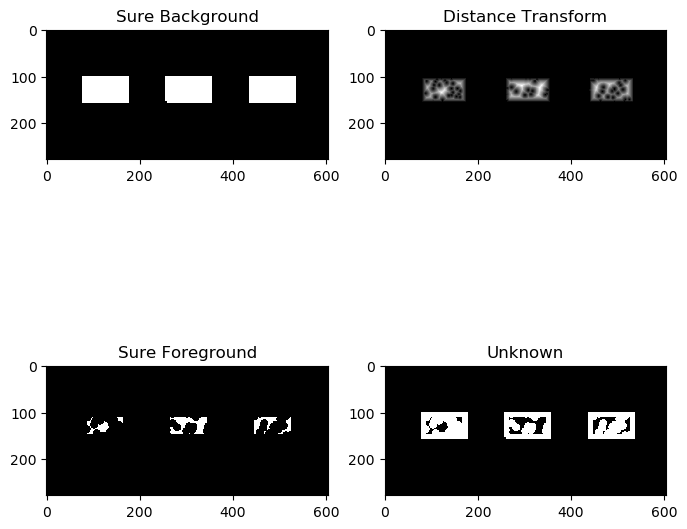

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# sure background area
sure_bg = cv.dilate(threshold, kernel, iterations=3)
axes[0, 0].imshow(sure_bg, cmap='gray')  # Added cmap='gray' for grayscale display
axes[0, 0].set_title('Sure Background')

# Distance transform
dist = cv.distanceTransform(threshold, cv.DIST_L2, 5)
axes[0, 1].imshow(dist, cmap='gray')  # Added cmap='gray' for grayscale display
axes[0, 1].set_title('Distance Transform')

# foreground area
ret, sure_fg = cv.threshold(dist, 0.5 * dist.max(), 255, cv.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)
axes[1, 0].imshow(sure_fg, cmap='gray')  # Added cmap='gray' for grayscale display
axes[1, 0].set_title('Sure Foreground')

# unknown area
unknown = cv.subtract(sure_bg, sure_fg)
axes[1, 1].imshow(unknown, cmap='gray')  # Added cmap='gray' for grayscale display
axes[1, 1].set_title('Unknown')

plt.show()


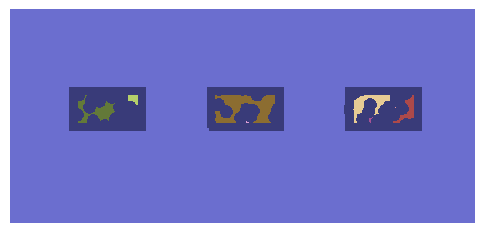

In [20]:
# Marker labelling
# sure foreground 
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that background is not 0, but 1
markers += 1
# mark the region of unknown with zero
markers[unknown == 255] = 0

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()


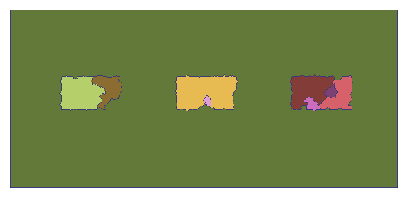

(-0.5, 604.5, 277.5, -0.5)

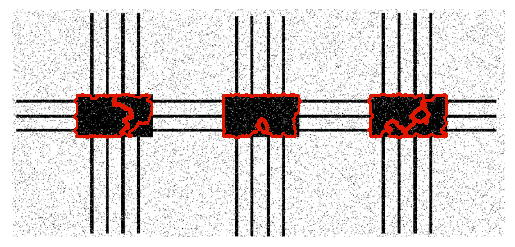

In [24]:
# watershed Algorithm
markers = cv.watershed(img, markers)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()


labels = np.unique(markers)

coins = []
for label in labels[2:]: 

# Create a binary image in which only the area of the label is in the foreground 
#and the rest of the image is in the background 
	target = np.where(markers == label, 255, 0).astype(np.uint8)

# Perform contour extraction on the created binary image
	contours, hierarchy = cv.findContours(
		target, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE
	)
	coins.append(contours[0])

# Draw the outline
img = cv.drawContours(img, coins, -1, color=(0, 23, 223), thickness=2)
imgrgb2 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(imgrgb2)
plt.axis('off') 
